# <center> Итоги модуля 14

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [112]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [113]:
mask = diabetes.duplicated()
mask.shape[0]

778

In [114]:
diabetes_drop = diabetes.drop_duplicates()
print(f'Результирующее число записей: {diabetes_drop.shape[0]}')

Результирующее число записей: 768


In [115]:
low_informative = []

for col in diabetes_drop.columns:
    top_freq = diabetes_drop[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes_drop[col].nunique() / diabetes_drop[col].count()
    
    if top_freq > 0.95:
        low_informative.append(col)
        print(f'{col}:{round(top_freq*100,2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_informative.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender:100.0% одинаковых значений


In [116]:
diabetes_drop = diabetes_drop.drop(low_informative, axis=1)

In [117]:
cols_null_percent = diabetes_drop.isnull().mean() * 100
cols_null_percent

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [118]:
def nun_func(x):
    return np.nan if x == 0 else x

In [119]:
diabetes_drop['Glucose'] = diabetes_drop['Glucose'].apply(nun_func)
diabetes_drop['BloodPressure'] = diabetes_drop['BloodPressure'].apply(nun_func)
diabetes_drop['SkinThickness'] = diabetes_drop['SkinThickness'].apply(nun_func)
diabetes_drop['Insulin'] = diabetes_drop['Insulin'].apply(nun_func)
diabetes_drop['BMI'] = diabetes_drop['BMI'].apply(nun_func)

In [120]:
cols_null_percent = diabetes_drop.isnull().mean() * 100
cols_null_percent

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [121]:
diabetes_drop = diabetes_drop.drop(['Insulin'], axis=1)

In [122]:
diabetes_drop.shape[1]

8

In [123]:
diabetes_drop.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1
767,0,125.0,96.0,NaN,22.5,0.262,21,0


In [124]:
m = diabetes_drop.shape[1]
diabetes_drop = diabetes_drop.dropna(thresh=m-2, axis=0)
print(diabetes_drop.shape[0])

761


In [125]:
diabetes_drop.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1
767,0,125.0,96.0,NaN,22.5,0.262,21,0


In [130]:
values = {
    'Glucose': diabetes_drop['Glucose'].median(),
    'BloodPressure': diabetes_drop['BloodPressure'].median(),
    'BMI': diabetes_drop['BMI'].median(),
    'SkinThickness': diabetes_drop['SkinThickness'].median()
}
diabetes_drop = diabetes_drop.fillna(values)
diabetes_drop['SkinThickness'].describe()


count    761.000000
mean      29.109067
std        8.831608
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [131]:
def outliers_iqr (data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned

In [133]:
outliers, cleaned = outliers_iqr(diabetes_drop, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


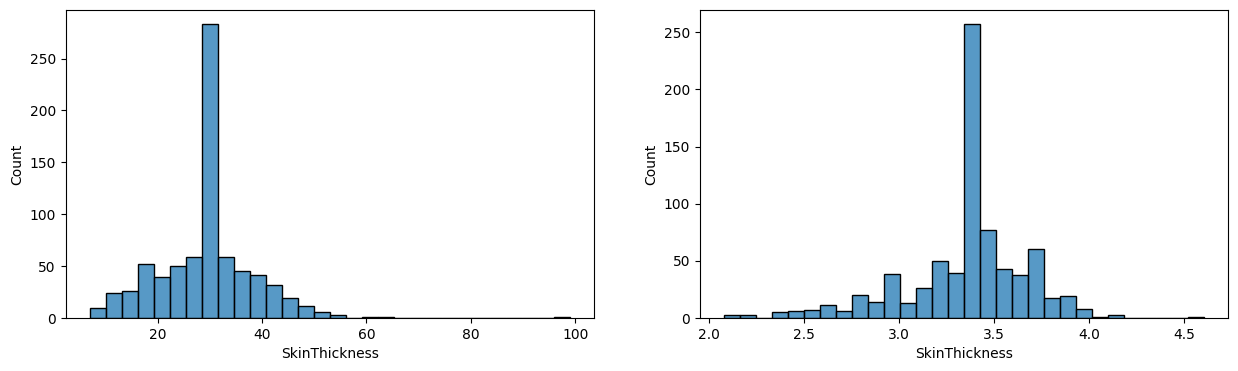

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
histplot = sns.histplot(diabetes_drop['SkinThickness'], bins=30, ax=axes[0])

log_mkad_km = np.log(diabetes_drop['SkinThickness']+1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=axes[1])

In [135]:
def outliers_z_score (data, feature, log_scale = False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [136]:
outliers, cleaned = outliers_z_score(diabetes_drop, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [137]:
outliers, cleaned = outliers_iqr(diabetes_drop, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [139]:
def outliers_z_score_1 (data, feature, log_scale = False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [140]:
outliers, cleaned = outliers_z_score_1(diabetes_drop, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 761
